## K-Means using scikit-learn API

In [2]:
# Generate data 
# Normalize - this might not be required as the scale of the data is similar
# Plot - Scatter
# Apply KMeans
# Plot Clusters
# Verify clusters -- this is possible as we are generating the data and we know the actual clusters upfront

# How many components

In [3]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from scipy.stats import mode

### Generate Data

In [4]:
from sklearn.datasets import  make_blobs
data = make_blobs(n_samples=100, n_features=2, centers=3, random_state=100)

type(data[0])
data[0].shape

input_data = data[0]

### Normalize data

I have commented the code as it might not be required to run as the scale of the data is similar

In [5]:
# input_data = normalize(input_data)

In [ ]:
input_data

### Visualize Data

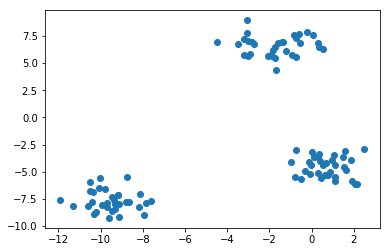

In [7]:
plt.scatter(input_data[:, 0], input_data[:, 1])

Since we know the clusters, let us color them based on which cluster they belong to.

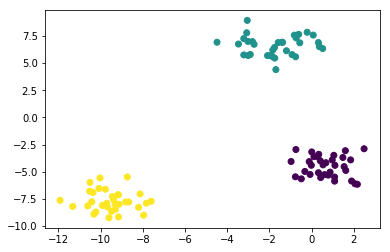

In [8]:
plt.scatter(input_data[:, 0], input_data[:, 1], c=data[1])

### How many components - Scree plot

In [15]:
wss = []
for i in range(1,10):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(input_data)
    wss.append(model.inertia_)
plt.plot(range(1,10), wss)

#### From the plot, k=3 is a good choice

### Fitting the model and predicting the cluster number

In [9]:
data_cluster = KMeans(3, random_state=0)

model = data_cluster.fit(input_data)
y_pred = model.predict(input_data)
y_pred

array([1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 1])

In [10]:
centroids = model.cluster_centers_
centroids

array([[-1.72134158,  6.61045437],
       [ 0.70353328, -4.52767455],
       [-9.52981151, -7.69781936]])

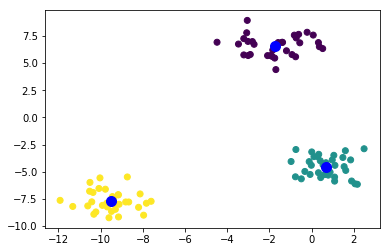

In [11]:
plt.scatter(input_data[:, 0], input_data[:, 1], c=y_pred)
# Plotting the centroids 
plt.scatter(centroids[: , 0], centroids[:, 1] , c = 'blue', s=100)

### Verify results

Since we know the actual clusters, we can check the cluster membership.
Since the cluster numbering of the model output could be different from the actual numbering, we need to number the cluster based on the mode of the cluster points.

In [12]:
data[1] == y_pred

array([False,  True, False,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False, False], dtype=bool)

Most of them false because the numbering is different and not because the clustering was wrong. To avoid this issue, we have to align the cluster numbering.

In [13]:
# Creating a copy so that the original does not get over-written
y_pred_copy = y_pred.copy()

for i in range(3):    
    y_pred_copy[y_pred ==i] = mode(data[1][y_pred == i]).mode
    
data[1] == y_pred_copy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)